# ロジスティクス回帰モデル

## 分類で扱うデータ

- 入力（各要素を説明変数または特徴量と呼ぶ） \
m次元のベクトル（$m=1$の場合はスカラー）
\begin{aligned}
\mathbf{x}
  &=
  \left(
    \begin{array}{cccc}
      x_1 & x_2 & \ldots & x_m
    \end{array}
  \right)^T \in \mathbb{R}^m \\[8px]
\end{aligned}

- 出力（目的変数） \
0 or 1の値
\begin{aligned}
 y \in \{0 , 1\}
\end{aligned}

# ハンズオン

In [16]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
# ロジスティクス回帰
from sklearn.linear_model import LogisticRegression
# データを扱う
import pandas as pd
# グラフ描画
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline

## データ表示

In [6]:
# titanic data csvファイルの読み込み
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 不要なデータの削除・欠損値の補完

In [7]:
#予測に不要と考えるからうをドロップ 
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#一部カラムをドロップしたデータを表示
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
#nullを含んでいる行を表示
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [9]:
#Ageカラムのnullを中央値で補完
titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

#再度nullを含んでいる行を表示 (Ageのnullは補完されている)
titanic_df[titanic_df.isnull().any(1)]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,29.699118
863,0,3,female,NaN,8,2,69.5500,S,29.699118
868,0,3,male,NaN,0,0,9.5000,S,29.699118
878,0,3,male,NaN,0,0,7.8958,S,29.699118


## 実装(チケット価格から生死を判別)

In [11]:
#運賃だけのリストを作成
data1 = titanic_df.loc[:, ["Fare"]].values

In [12]:
#生死フラグのみのリストを作成
label1 =  titanic_df.loc[:,["Survived"]].values

In [21]:
#ロジスティクス回帰モデルの定義
model=LogisticRegression()
# モデルの学習
model.fit(data1, label1)

C:\Users\takas\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
# 入力値が61の場合の予測結果
model.predict([[61]])

array([0], dtype=int64)

In [20]:
# 入力値が62の場合の予測結果（0と1のそれぞれの確率）
model.predict_proba([[62]])

array([[0.49978123, 0.50021877]])

In [30]:
# 求まったパラメータの結果
w_0 = model.intercept_[0]            ##切片
w_1 = model.coef_[0,0]               ##傾き
print('w_0:',w_0)
print('w_1:',w_1)

w_0: -0.9413179631999782
w_1: 0.01519666204854612


No handles with labels found to put in legend.


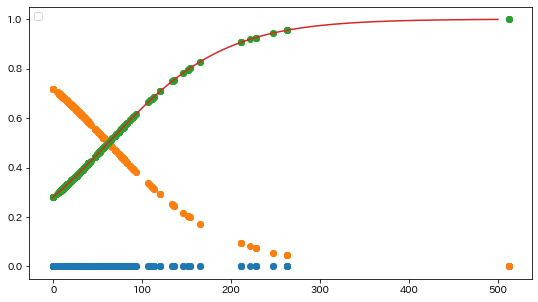

In [29]:

def sigmoid(x):
    return 1 / (1+np.exp(-(w_1*x+w_0)))

x_range = np.linspace(-1, 500, 3000)

plt.figure(figsize=(9,5))
plt.legend(loc=2)

plt.plot(data1,np.zeros(len(data1)), 'o')
plt.plot(data1, model.predict_proba(data1), 'o')
plt.plot(x_range, sigmoid(x_range), '-')
